In [ ]:
Assignment 3: Text Generation with LSTM 
Objective: 
Use LSTM to generate text based on a large corpus, such as song lyrics or book excerpts. 
Dataset: 
Kaggle - Song Lyrics 
Alternatively, use public domain books from Project Gutenberg. 
Steps: 
1. Data Preprocessing 
o Load the dataset into a DataFrame or read from a text file. 
o Convert all text to lowercase and remove special characters. 
o Tokenize and encode characters into integers. 
o Create sequences of fixed length (e.g., 50 characters). 
2. Model Development 
o Build an LSTM model with: 
Embedding layer (character-level or word-level embeddings). 
2 LSTM layers with 256 and 128 units. 
Dropout layers to prevent overfitting. 
Dense output layer with softmax activation. 
o Compile with categorical_crossentropy loss and adam optimizer. 
3. Training and Generation 
o Train the model on the text sequences. 
o Use the model to generate new text, given a seed phrase. 
o Adjust temperature parameter to control creativity. 
Evaluation Criteria: 
Coherence and fluency of the generated text. 
Ability to generate creative and meaningful sequences. 
 Model convergence and generalization.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubhammaindola/harry-potter-books")

print("Path to dataset files:", path)

C:\Users\SASWATA\.conda\envs\gpusupport\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|█████████████████████████████████████████████████████████████████████████████| 2.28M/2.28M [00:01<00:00, 1.58MB/s]

Extracting files...
Path to dataset files: C:\Users\SASWATA\.cache\kagglehub\datasets\shubhammaindola\harry-potter-books\versions\1


In [1]:
first_book_path=r"C:\Users\SASWATA\.cache\kagglehub\datasets\shubhammaindola\harry-potter-books\versions\1\01 Harry Potter and the Sorcerers Stone.txt"
second_book_path=r"C:\Users\SASWATA\.cache\kagglehub\datasets\shubhammaindola\harry-potter-books\versions\1\02 Harry Potter and the Chamber of Secrets.txt"
third_book_path=r"C:\Users\SASWATA\.cache\kagglehub\datasets\shubhammaindola\harry-potter-books\versions\1\03 Harry Potter and the Prisoner of Azkaban.txt"
fourth_book_path=r"C:\Users\SASWATA\.cache\kagglehub\datasets\shubhammaindola\harry-potter-books\versions\1\04 Harry Potter and the Goblet of Fire.txt"
fifth_book_path=r"C:\Users\SASWATA\.cache\kagglehub\datasets\shubhammaindola\harry-potter-books\versions\1\05 Harry Potter and the Order of the Phoenix.txt"
sixth_book_path=r"C:\Users\SASWATA\.cache\kagglehub\datasets\shubhammaindola\harry-potter-books\versions\1\06 Harry Potter and the Half-Blood Prince.txt"
seventh_book_path=r"C:\Users\SASWATA\.cache\kagglehub\datasets\shubhammaindola\harry-potter-books\versions\1\07 Harry Potter and the Deathly Hallows.txt"

In [46]:
import re
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
def process_text(corpus):
    text=re.sub(r'[^a-z0-9\s\.\,\;\:\!\?\'\"]', ' ',corpus)#remove puncutations and unwanted chars
    text = re.sub(r'\s+', ' ', text).strip() # removing multiple spaces
    return text

In [4]:
def tokenize(text):#tokenization
    tokenizer=Tokenizer()
    tokenizer.fit_on_texts([text])
    total_words=len(tokenizer.word_index)+1
    return total_words,tokenizer

In [5]:
def create_sequences(text, seq_length):
    sequences = []
    words = text.split()
    for i in range(0, len(words) - seq_length + 1):
        seq = words[i:i + seq_length]
        sequences.append(' '.join(seq))
    return sequences

In [6]:
def convert_to_integer_seq_and_pad(sequence_text, tokenizer, seq_length):
    sequences = tokenizer.texts_to_sequences(sequence_text)
    sequences = pad_sequences(sequences, maxlen=seq_length, padding='pre')
    X = sequences[:, :-1]  # Input: all tokens except the last
    y = sequences[:, -1]   # Target: last token
    #vocab_size = len(tokenizer.word_index) + 1
    #y = tf.keras.utils.to_categorical(y, num_classes=vocab_size)
    return X, y

In [7]:
def create_model(input_dim,output_dim,input_length,units,total_words):
    model=tf.keras.Sequential(
        [
            tf.keras.layers.Embedding(input_dim=input_dim,output_dim=output_dim,input_length=input_length),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units,return_sequences=True)),
            tf.keras.layers.Dropout(0.15),
            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units//2,return_sequences=False)),
            tf.keras.layers.Dropout(0.25),
            tf.keras.layers.Dense(total_words,activation='softmax')
        ]
    )
    return model

In [42]:
def sample_with_temperature(preds, temperature=1.0):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds + 1e-8) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)

In [44]:
def generate_text(seed_text, next_words=50, temperature=1.0):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=seq_length-1, padding='pre')
        preds = model.predict(token_list, verbose=0)[0]
        next_index = sample_with_temperature(preds, temperature)
        next_word = tokenizer.index_word.get(next_index, '')
        seed_text += ' ' + next_word
    return seed_text

In [10]:
with open(first_book_path, 'r', encoding='utf-8') as f:
    text1 = f.read().lower()
with open(second_book_path, 'r', encoding='utf-8') as f:
    text2 = f.read().lower()
with open(third_book_path, 'r', encoding='utf-8') as f:
    text3 = f.read().lower()
with open(fourth_book_path, 'r', encoding='utf-8') as f:
    text4 = f.read().lower()
with open(fifth_book_path, 'r', encoding='utf-8') as f:
    text5 = f.read().lower()
with open(sixth_book_path, 'r', encoding='utf-8') as f:
    text6 = f.read().lower()
with open(seventh_book_path, 'r', encoding='utf-8') as f:
    text7 = f.read().lower()

In [25]:
corpus=text1 #+ '\n' +text2 + '\n' +text3 + '\n' +text4 + '\n' +text5 + '\n' +text6 + '\n' +text7 #entire seven boook corpus

In [26]:
cleaned_corpus=process_text(corpus)

In [27]:
total_words,tokenizer=tokenize(cleaned_corpus)

In [28]:
seq_length = 250
sequences = create_sequences(cleaned_corpus, seq_length)
X, y = convert_to_integer_seq_and_pad(sequences, tokenizer, seq_length)

In [29]:
vocab_size = len(tokenizer.word_index) + 1

In [36]:
model = create_model(input_dim=total_words, output_dim=10000, input_length=seq_length - 1, units=256, total_words=total_words)

In [37]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 249, 10000)        57370000  
                                                                 
 bidirectional_8 (Bidirectio  (None, 249, 512)         21006336  
 nal)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 249, 512)          0         
                                                                 
 bidirectional_9 (Bidirectio  (None, 256)              656384    
 nal)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 5737)             

In [38]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [39]:
history=model.fit(X,y,epochs=75)

Epoch 1/75
2519/2519 [==============================] - 398s 157ms/step - loss: 6.2246 - accuracy: 0.0811
Epoch 2/75
2519/2519 [==============================] - 396s 157ms/step - loss: 5.6426 - accuracy: 0.1146
Epoch 3/75
2519/2519 [==============================] - 396s 157ms/step - loss: 5.3504 - accuracy: 0.1289
Epoch 4/75
2519/2519 [==============================] - 395s 157ms/step - loss: 5.1212 - accuracy: 0.1385
Epoch 5/75
2519/2519 [==============================] - 396s 157ms/step - loss: 4.9105 - accuracy: 0.1473
Epoch 6/75
2519/2519 [==============================] - 396s 157ms/step - loss: 4.7086 - accuracy: 0.1588
Epoch 7/75
2519/2519 [==============================] - 396s 157ms/step - loss: 4.5273 - accuracy: 0.1655
Epoch 8/75
2519/2519 [==============================] - 395s 157ms/step - loss: 4.3531 - accuracy: 0.1760
Epoch 9/75
2519/2519 [==============================] - 396s 157ms/step - loss: 4.1993 - accuracy: 0.1862
Epoch 10/75
2519/2519 [=======================

In [47]:
seed = "Once upon a time"
generated = generate_text(seed_text=seed, next_words=50, temperature=1.0)
print("Generated Text:")
print(generated)

Generated Text:
Once upon a time ollivanders search practice of his voice was he and doing the last month aren t you better do slytherin the stone night if he wanted to say i m top wanted about hard that you walked professor mcgonagall pulled it people are two quite anythin they are make sure back


In [48]:
generate_text("Then voldemort said", next_words=50, temperature=0.5)

'Then Harry said quietly then harry and had ever hermione had started a beckoned in the door roared him large slytherin o clock harry swallowed ron and knocked ron joined them was no peering by months by book for this wizard i told somewhere ter returned his broken out harry all could words get down ter horrible owls hagrid petunia tried twin was locked hagrid still raised his envelope up fingers engine malfoy see ran leaving magical important wooden window outside harry and he kept him thick said percy trying on no wonder ron kept a doesn and slightly so bad sleepily came swiftly harry made harry and when then stopped stuff in several but he threw the flickering left a round voice i don t come in slytherin i did mind you sir yer one already this didn t believe in the line back few trembling is sprinting to bill harry lay come on properly on night like against not really wanted who would look the white field that weasley harry who looked extremely six something at yer run aunt petunia 

In [51]:
generate_text("Meanwhile at ollivanders Harry was", next_words=100, temperature=1.0)

'Meanwhile at ollivanders Harry was starting to the last time dumbledore was still wearing now a year aren t instead fat way behind them and three quarters showed him stone against the name what they had hardly forgotten what said harry quietly on his feet harry thought in a black eye ron muttered students a video black robes frog and the happy movement on which up were raised feet the stone wonder if mcgonagall s eyes table rippled with their legs robes trees watched it on the table what are you late filch now found professor mcgonagall to greatness with some weeks to the quidditch'

In [50]:
generate_text("Then Harry said", next_words=250, temperature=1.5)

'Then Harry said and did say want around feet even when snape off his job old tosh even look hot boy any d have time telling fluffy me start or cheer across their shoulders third white notes are a time better feeling down it holding meddlin looking very frightened can still planets hermione went hermione rolled up em whippy loopy there professor ron heard out his eyes table dumbledore said professor mcgonagall a braver study when unicorn to make harry went on thousands who snape tapped him feet were floating security inside back notes across a wizard mountains with nothing shakily he remembers to find out a whole he could have managed to die and hermione looked desperate just as only said first two like this outta a bit did so a as his mind they know in london snape and she said it broke the note knew it nonsense easier apart is but secret didn t leave more rules all this do quirrell how i don t want you attacked standing yeh hagrid waited ron felt too cold are ours back here eh yeh ha

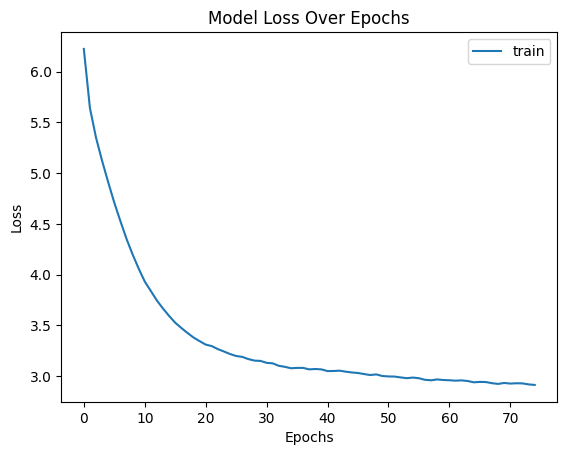

In [54]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.legend()
plt.title("Model Loss Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

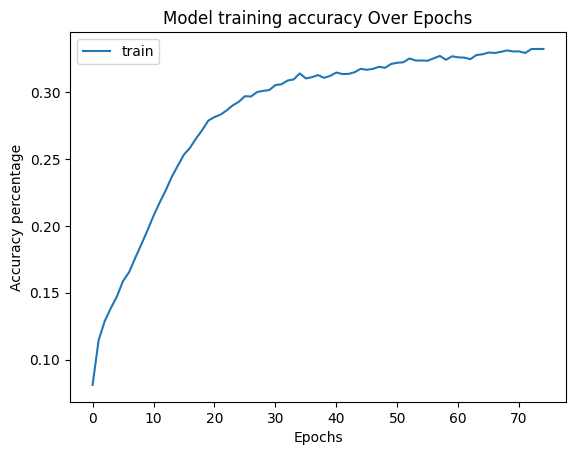

In [56]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train')
plt.legend()
plt.title("Model training accuracy Over Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy percentage")
plt.show()